## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [5]:
X = pd.DataFrame(data, columns=feature_names)
X.info()
# X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(486, 13)
После:	(486, 2)


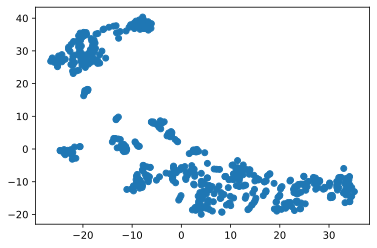

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [13]:
from sklearn.cluster import KMeans

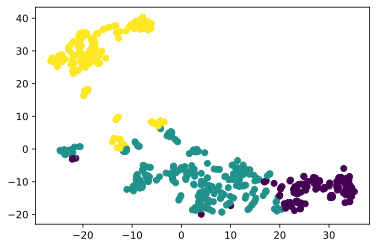

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [15]:
print(f'Первый кластер: {y_train[labels_train == 0].mean()}')
print(f'Второй кластер: {y_train[labels_train == 1].mean()}')
print(f'Третий кластер: {y_train[labels_train == 2].mean()}')

Первый кластер: price    28.223469
dtype: float64
Второй кластер: price    24.466239
dtype: float64
Третий кластер: price    16.259091
dtype: float64


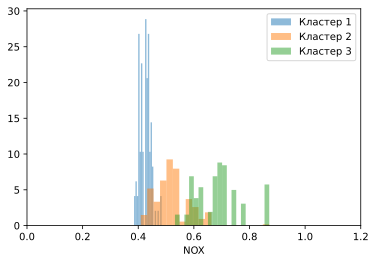

In [22]:
plt.hist(X_train.loc[labels_train == 0, 'NOX'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'NOX'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'NOX'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 1.2)
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('NOX')

plt.show()

In [16]:
print(f'Первый кластер: {X_train["CRIM"][labels_train == 0].mean()}')
print(f'Второй кластер: {X_train["CRIM"][labels_train == 1].mean()}')
print(f'Третий кластер: {X_train["CRIM"][labels_train == 2].mean()}')

Первый кластер: 0.07128102040816328
Второй кластер: 0.3966826068376069
Третий кластер: 10.671657142857145


## Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [17]:
scaler = StandardScaler()

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_train.columns)
X_test_tsne = tsne.fit_transform(X_test_scaled)

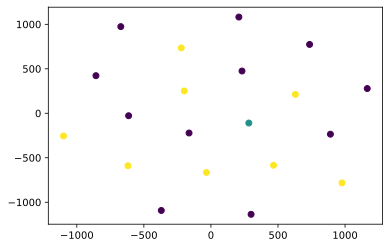

In [18]:
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [19]:
print(f'Первый кластер: {X_test["CRIM"][labels_test == 0].mean()}')
print(f'Второй кластер: {X_test["CRIM"][labels_test == 1].mean()}')
print(f'Третий кластер: {X_test["CRIM"][labels_test == 2].mean()}')

Первый кластер: 0.13808727272727273
Второй кластер: 45.7461
Третий кластер: 4.74167375
